In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

This notebook will contain the code to plot clone maps for hte paper. 

In [5]:
import h5py
import numpy as np
from astropy.units import deg
#from lenstools import GaussianNoiseGenerator, ConvergenceMap
from scipy.ndimage import gaussian_filter

I want to study the global property of the clone dsets that I made. Specifically, 
* Power spectra
* Peak counts
* General pixel counts

I also want to see if these have any trends with cosmology, esp compared to the original maps. 

In [6]:
smooths = [0.0, 1.0]
noises= np.array([0.0, 0.29])
shape_noises = noises/np.sqrt((2.34**2)*30) #sigma_e/sqrt(A*n)
data_mod1 = lambda x:x
data_mod2 = lambda x: gaussian_filter(x+np.random.randn(*x.shape)*shape_noises[1], smooths[1])# add a normalization, hopefully sufficient

data_mods = [data_mod1, data_mod2]

In [7]:
%%bash
ls ~/scratch/clone_maps/*DeepResnet*.hdf5 -ltr

-rw-r--r-- 1 swmclau2 risahw 68121396560 Sep 21 17:26 /home/users/swmclau2/scratch/clone_maps/UatuFastPMTrainingRobustifyDeepResnetRegAdvWhiteNoise0.0_v6.hdf5
-rw-r--r-- 1 swmclau2 risahw 68121396560 Sep 28 17:48 /home/users/swmclau2/scratch/clone_maps/UatuFastPMTrainingRobustifyDeepResnetRegAdvWhiteNoise1.0_v6.hdf5
-rw-r--r-- 1 swmclau2 risahw 57598726904 Oct  2 17:06 /home/users/swmclau2/scratch/clone_maps/UatuFastPMTrainingRobustifyDeepResnetRegAdvGRF0.0_v6.hdf5
-rw-r--r-- 1 swmclau2 risahw 59112697680 Oct  2 17:06 /home/users/swmclau2/scratch/clone_maps/UatuFastPMTrainingRobustifyDeepResnetRegAdvGRF1.0_v6.hdf5


In [8]:
orig_fname = '/home/users/swmclau2/oak/Uatu/UatuFastPMTraining/UatuFastPMTraining.hdf5'
#grf_fname = '/home/users/swmclau2/oak/Uatu/UatuFastPMTraining/UatuFastPMTrainingGRF_smooth_%0.1f_noise_%0.1f.hdf5'#%(smooth,shape_noise)
clone_fname = '/scratch/users/swmclau2/clone_maps/UatuFastPMTrainingRobustifyFluriNetRegAdvWhiteNoise%.1f.hdf5'#%smooth
clone_fname2 = '/scratch/users/swmclau2/clone_maps/UatuFastPMTrainingRobustifyDeepResnetRegAdvGRF%0.1f_v6.hdf5'#%smooth

#clone_fname = '/home/users/swmclau2/oak/Uatu/UatuFastPMTraining/UatuFastPMTrainingRobustifyDeepResnetRegAdvGRFNoise1.0.hdf5'

In [9]:
def plot_set(orig_fname, clone_fname, clone_fname2, boxno, idx):
    fig, axes = plt.subplots(2,3, figsize=(9,6))
    
    for smooth, shape_noise, data_mod, ax in zip(smooths,\
                                                 shape_noises,
                                                 data_mods, axes):
        for fname, a in zip([orig_fname, clone_fname, clone_fname2],
                            ax):
            
            if fname!=orig_fname:
                fname = fname%smooth
            print fname
            print '*'*10
            try:    
                with h5py.File(fname, 'r') as f:
                    X = f[boxno]['X'][idx, :].squeeze()
            except IOError:
                print 'Error loading %s'%fname
                continue
            X = data_mod(X)
            X = (X-X.mean())/X.std()
            
            a.imshow(X)
     
    titles = ['Original', 'White Noise Clone', 'GRF Clone']
    labels = ['Noiselesss', 'Noisy']
    for i,  title in enumerate( titles):
        axes[0][i].set_title(title)
    for j, label in enumerate(labels):
        axes[j][0].set_ylabel(label)
        
    fig.tight_layout()    
    plt.show()

    #plt.title('Original')
    #plt.title('White Noise Clone')
    #plt.title('GRF Clone')



/home/users/swmclau2/oak/Uatu/UatuFastPMTraining/UatuFastPMTraining.hdf5
**********
/scratch/users/swmclau2/clone_maps/UatuFastPMTrainingRobustifyFluriNetRegAdvWhiteNoise0.0.hdf5
**********
/scratch/users/swmclau2/clone_maps/UatuFastPMTrainingRobustifyDeepResnetRegAdvGRF0.0_v6.hdf5
**********
/home/users/swmclau2/oak/Uatu/UatuFastPMTraining/UatuFastPMTraining.hdf5
**********
/scratch/users/swmclau2/clone_maps/UatuFastPMTrainingRobustifyFluriNetRegAdvWhiteNoise1.0.hdf5
**********
/scratch/users/swmclau2/clone_maps/UatuFastPMTrainingRobustifyDeepResnetRegAdvGRF1.0_v6.hdf5
**********


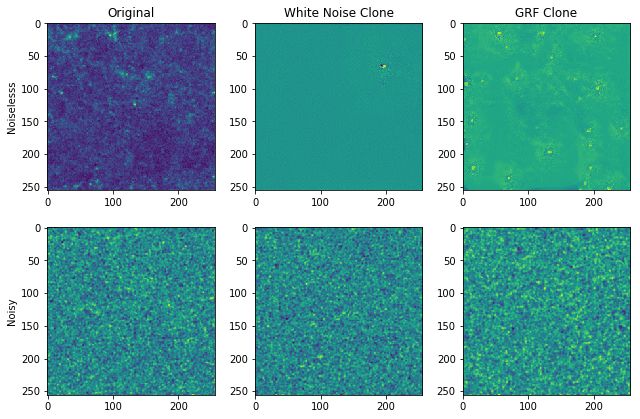

In [14]:
xt = plot_set(orig_fname, clone_fname, clone_fname2, 'Box111', 200)

idea: cross correlate peak locations with embedding maps 